In [1]:
import pandas as pd
import numpy as np 
import pickle

import matplotlib.pyplot as plt 
import seaborn as sns
from wordcloud import WordCloud
sns.set()

import nltk
# nltk.download('tagsets')

In [2]:
df = pd.read_csv(r'D:\ThucTapDuAn_NLP\Job-Description-Skills-Extractor\df_description_processed.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5379 entries, 0 to 5378
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Description         5379 non-null   object
 1   lower_description   5379 non-null   object
 2   word_tokenized      5379 non-null   object
 3   sentence_tokenized  5379 non-null   object
 4   word_count          5379 non-null   int64 
 5   sentence_count      5379 non-null   int64 
 6   clean_words         5379 non-null   object
 7   clean_stemmed       5379 non-null   object
 8   clean_lemmed        5379 non-null   object
dtypes: int64(2), object(7)
memory usage: 378.3+ KB


In [3]:
# duplicates reduce the df by 651 observations
df.drop_duplicates(inplace = True)
df.shape

(4728, 9)

In [4]:
df.head()

,Description,lower_description,word_tokenized,sentence_tokenized,word_count,sentence_count,clean_words,clean_stemmed,clean_lemmed
0,"POSITION SUMMARY, The Business Analyst role is...","position summary, the business analyst role is...","['position', 'summary', 'the', 'business', 'an...","['POSITION SUMMARY, The Business Analyst role ...",424,25,"['position', 'summary', 'business', 'analyst',...","['posit', 'summari', 'busi', 'analyst', 'role'...","['position', 'summary', 'business', 'analyst',..."
1,"What do we need?, You to have an amazing perso...","what do we need?, you to have an amazing perso...","['what', 'do', 'we', 'need', 'you', 'to', 'hav...","['What do we need?, You to have an amazing per...",286,10,"['need', 'amazing', 'personality', 'communicat...","['need', 'amaz', 'person', 'commun', 'style', ...","['need', 'amazing', 'personality', 'communicat..."
2,"Validate, analyze, and conduct statistical ana...","validate, analyze, and conduct statistical ana...","['validate', 'analyze', 'and', 'conduct', 'sta...","['Validate, analyze, and conduct statistical a...",314,24,"['validate', 'analyze', 'conduct', 'statistica...","['valid', 'analyz', 'conduct', 'statist', 'ana...","['validate', 'analyze', 'conduct', 'statistica..."
3,"Full time, Washington, DC metro area, Starting...","full time, washington, dc metro area, starting...","['full', 'time', 'washington', 'dc', 'metro', ...","['Full time, Washington, DC metro area, Starti...",297,13,"['full', 'time', 'washington', 'dc', 'metro', ...","['full', 'time', 'washington', 'dc', 'metro', ...","['full', 'time', 'washington', 'dc', 'metro', ..."
4,Assist in consultations with business partners...,assist in consultations with business partners...,"['assist', 'in', 'consultations', 'with', 'bus...",['Assist in consultations with business partne...,316,7,"['assist', 'consultations', 'business', 'partn...","['assist', 'consult', 'busi', 'partner', 'inte...","['assist', 'consultation', 'business', 'partne..."


# Parts of Speech Tagging (POS)

In [5]:
def pos_series(keyword):
    '''categorizes parts of speech after tokenizing words with POS tags'''
    tokens = nltk.word_tokenize(keyword)
    tagged = nltk.pos_tag(tokens)
    return tagged

In [7]:
import nltk
nltk.download('averaged_perceptron_tagger_eng')

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     C:\Users\sora sama\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger_eng.zip.


True

In [8]:
# cell runs slower due to computational exhaustion
pos_tagged_arrs = df.lower_description.apply(pos_series)

In [9]:
print(pos_tagged_arrs[0:2])

0    [(position, NN), (summary, NN), (,, ,), (the, ...
1    [(what, WP), (do, VBP), (we, PRP), (need, VB),...
Name: lower_description, dtype: object


In [10]:
# unloads the tuples from the tree object for easier manipulation
pos_tagged = []
for row in pos_tagged_arrs.values:
    for element in row:
        pos_tagged.append(element)

In [11]:
print(pos_tagged_arrs[0:2])

0    [(position, NN), (summary, NN), (,, ,), (the, ...
1    [(what, WP), (do, VBP), (we, PRP), (need, VB),...
Name: lower_description, dtype: object


In [12]:
# dataframe contains all of the words with their corresponding pos tag;
pos_df = pd.DataFrame(pos_tagged, columns = ('word','POS'))
# special chars were removed due to irrelevance as a tag but will be included in regex
char_removal = [',', '.', ':', '#', '$', '\'\'', '``', '(', ')']
drop_indices = (pos_df.loc[pos_df.POS.isin(char_removal)].index)
pos_df.drop(drop_indices, inplace = True)

In [13]:
# frequency of the unique pos tags within the dataset
pos_sum = pos_df.groupby('POS').count() # group by POS tags
pos_sum.sort_values(['word'], ascending=[False]) # in descending order of number of words per tag

,word
POS,
NN,518275
NNS,264850
JJ,228653
IN,186738
CC,137946
DT,92567
VB,87799
VBG,64463
TO,57670


In [14]:
# takes a random sample and shows structure of array along with how each is tagged
sample = df.lower_description.sample(5)
samples = []
for doc in sample:
    tokens = nltk.word_tokenize(doc)
    samples.append(nltk.pos_tag(tokens))
    
samples[2]

[('we', 'PRP'),
 ("'re", 'VBP'),
 ('committed', 'VBN'),
 ('to', 'TO'),
 ('bringing', 'VBG'),
 ('passion', 'NN'),
 ('and', 'CC'),
 ('customer', 'NN'),
 ('focus', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('business', 'NN'),
 ('.', '.'),
 ('general', 'JJ'),
 ('summary', 'NN'),
 (',', ','),
 ('this', 'DT'),
 ('role', 'NN'),
 ('on', 'IN'),
 ('the', 'DT'),
 ('enterprise', 'NN'),
 ('data', 'NN'),
 ('team', 'NN'),
 ('will', 'MD'),
 ('support', 'VB'),
 ('our', 'PRP$'),
 ('data', 'NNS'),
 ('engineering', 'NN'),
 ('initiatives', 'NNS'),
 (',', ','),
 ('including', 'VBG'),
 ('the', 'DT'),
 ('development', 'NN'),
 ('of', 'IN'),
 ('our', 'PRP$'),
 ('“', 'NNP'),
 ('data', 'NNS'),
 ('lake', 'VBP'),
 ('”', 'JJ'),
 ('architecture', 'NN'),
 ('.', '.'),
 ('this', 'DT'),
 ('role', 'NN'),
 ('is', 'VBZ'),
 ('primarily', 'RB'),
 ('project', 'NN'),
 ('based', 'VBN'),
 (',', ','),
 ('but', 'CC'),
 ('also', 'RB'),
 ('may', 'MD'),
 ('provide', 'VB'),
 ('support', 'NN'),
 ('and', 'CC'),
 ('maintenance', 'NN'),
 ('to

# Analyses of POS


In [16]:
# ensure the tagset help data is available, then print out POS tag help for reference
nltk.download('tagsets_json', quiet=True)
for tag in pos_df.POS.unique():
    # nltk.help.upenn_tagset prints documentation to stdout; no need to print its return value
    nltk.help.upenn_tagset(tag)

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
VBZ: verb, present tense, 3rd person singular
    bases reconstructs marks mixes displeases seals carps weaves snatches
    slumps stretches authorizes smolders pictures emerges stockpiles
    seduces fizzes uses bolsters slaps speaks pleads ...
JJ: adjective or numeral, ordinal
    third ill-mannered pre-war regrettable oiled calamitous first separable
    ectoplasmic battery-powered participatory fourth still-to-be-named
    multilingual multi-disciplinary ...
IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below

In [17]:
# sandbox cell
pos_tagged_arrs[578]

[('cas', 'NN'),
 ('uses', 'VBZ'),
 ('intuitive', 'JJ'),
 ('technology', 'NN'),
 (',', ','),
 ('unparalleled', 'JJ'),
 ('scientific', 'JJ'),
 ('content', 'NN'),
 ('and', 'CC'),
 ('unmatched', 'JJ'),
 ('human', 'JJ'),
 ('expertise', 'NN'),
 ('to', 'TO'),
 ('help', 'VB'),
 ('companies', 'NNS'),
 ('create', 'VB'),
 ('groundbreaking', 'VBG'),
 ('innovations', 'NNS'),
 ('that', 'WDT'),
 ('benefit', 'VBP'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('.', '.'),
 ('as', 'IN'),
 ('the', 'DT'),
 ('scientific', 'JJ'),
 ('information', 'NN'),
 ('solutions', 'NNS'),
 ('division', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('american', 'JJ'),
 ('chemical', 'NN'),
 ('society', 'NN'),
 (',', ','),
 ('cas', 'NN'),
 ('manages', 'VBZ'),
 ('the', 'DT'),
 ('largest', 'JJS'),
 ('curated', 'JJ'),
 ('reservoir', 'NN'),
 ('of', 'IN'),
 ('scientific', 'JJ'),
 ('knowledge', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('for', 'IN'),
 ('111', 'CD'),
 ('years', 'NNS'),
 (',', ','),
 ('has', 'VBZ'),
 ('helped', 'VBN'),
 ('innovators',

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\2348597238.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  jjbar.set_yticklabels(jjbar.get_yticklabels(), fontsize = 15);


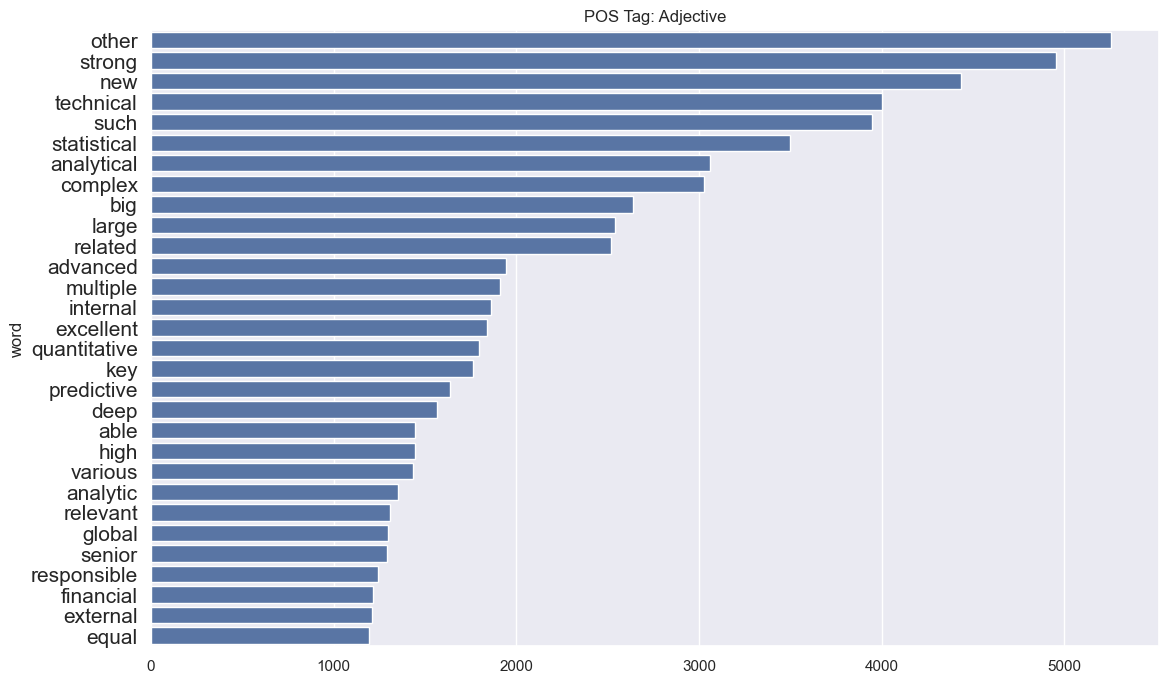

In [19]:
# adjectives
jj_tag = pos_df.loc[pos_df.POS == 'JJ'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
jjbar = sns.barplot(y = jj_tag.index, x = jj_tag.values, orient = 'h')
plt.title('POS Tag: Adjective')
jjbar.set_yticklabels(jjbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\4058152581.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  nnbar.set_yticklabels(nnbar.get_yticklabels(), fontsize = 15);


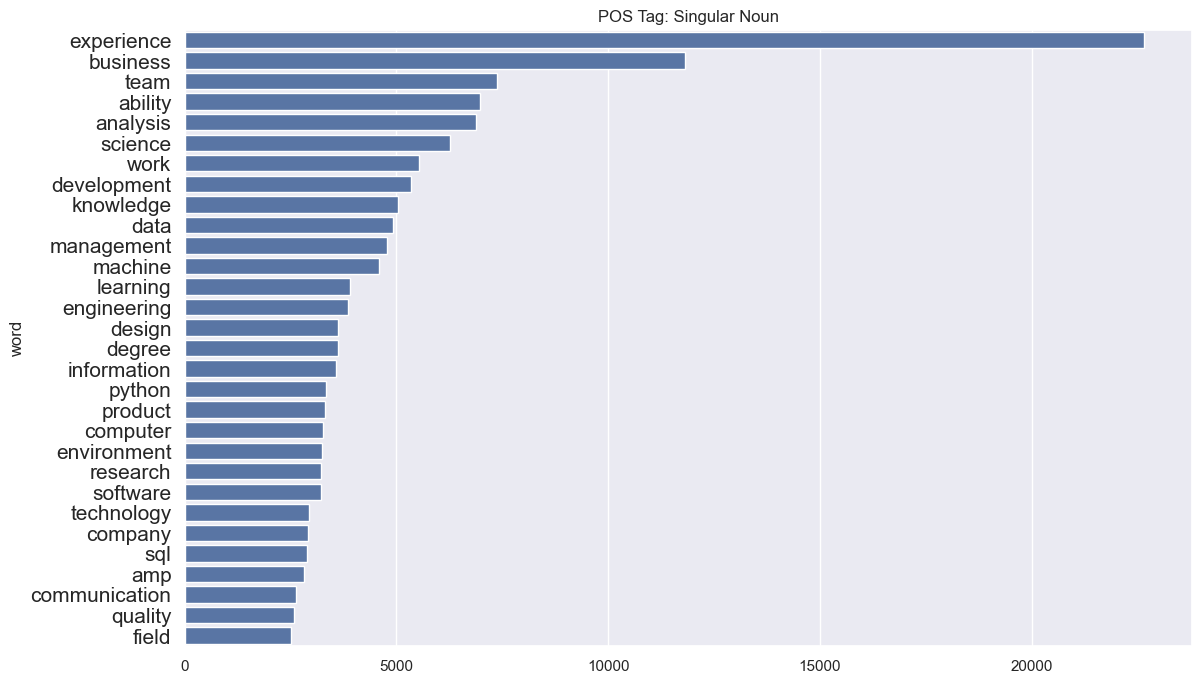

In [20]:
# nouns singular
nn_tag = pos_df.loc[pos_df.POS == 'NN'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
nnbar = sns.barplot(y = nn_tag.index, x = nn_tag.values, orient = 'h')
plt.title('POS Tag: Singular Noun')
nnbar.set_yticklabels(nnbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\363935559.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  NNSbar.set_yticklabels(NNSbar.get_yticklabels(), fontsize = 15);


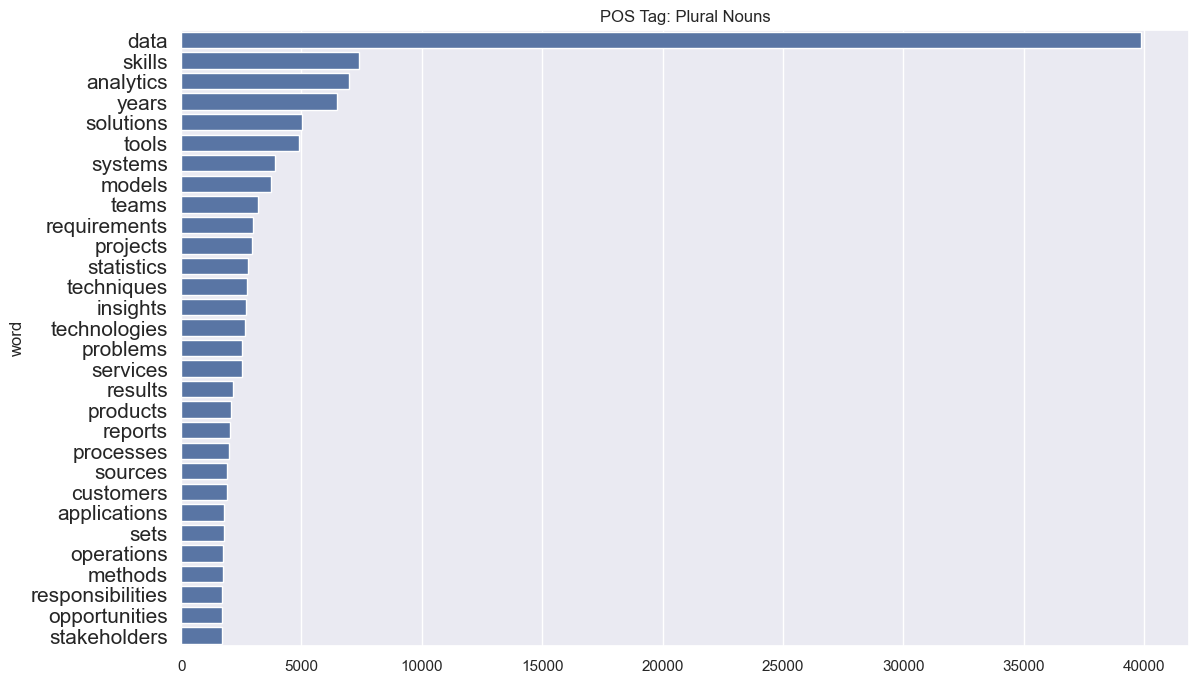

In [21]:
# nouns plural
NNS_tag = pos_df.loc[pos_df.POS == 'NNS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNSbar = sns.barplot(y = NNS_tag.index, x = NNS_tag.values, orient = 'h')
plt.title('POS Tag: Plural Nouns')
NNSbar.set_yticklabels(NNSbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\1467929484.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  VBbar.set_yticklabels(VBbar.get_yticklabels(), fontsize = 15);


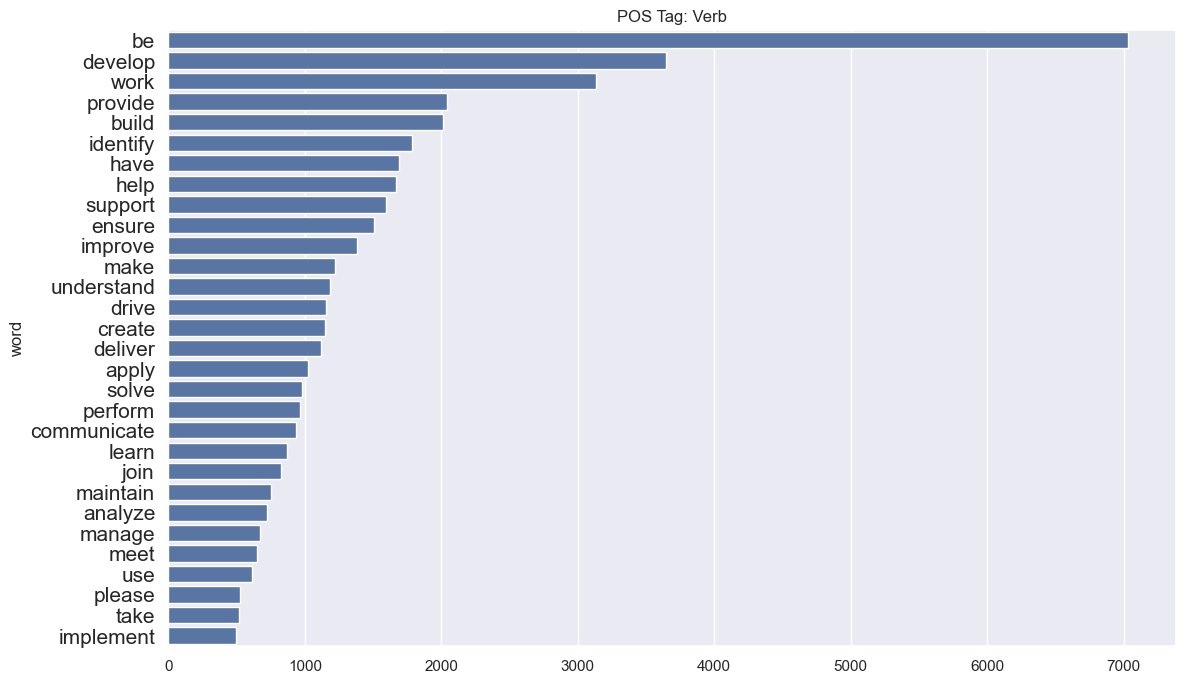

In [22]:
# verb base form 
VB_tag = pos_df.loc[pos_df.POS == 'VB'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBbar = sns.barplot(y = VB_tag.index, x = VB_tag.values, orient = 'h')
plt.title('POS Tag: Verb')
VBbar.set_yticklabels(VBbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\2923057724.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  VBGbar.set_yticklabels(VBGbar.get_yticklabels(), fontsize = 15);


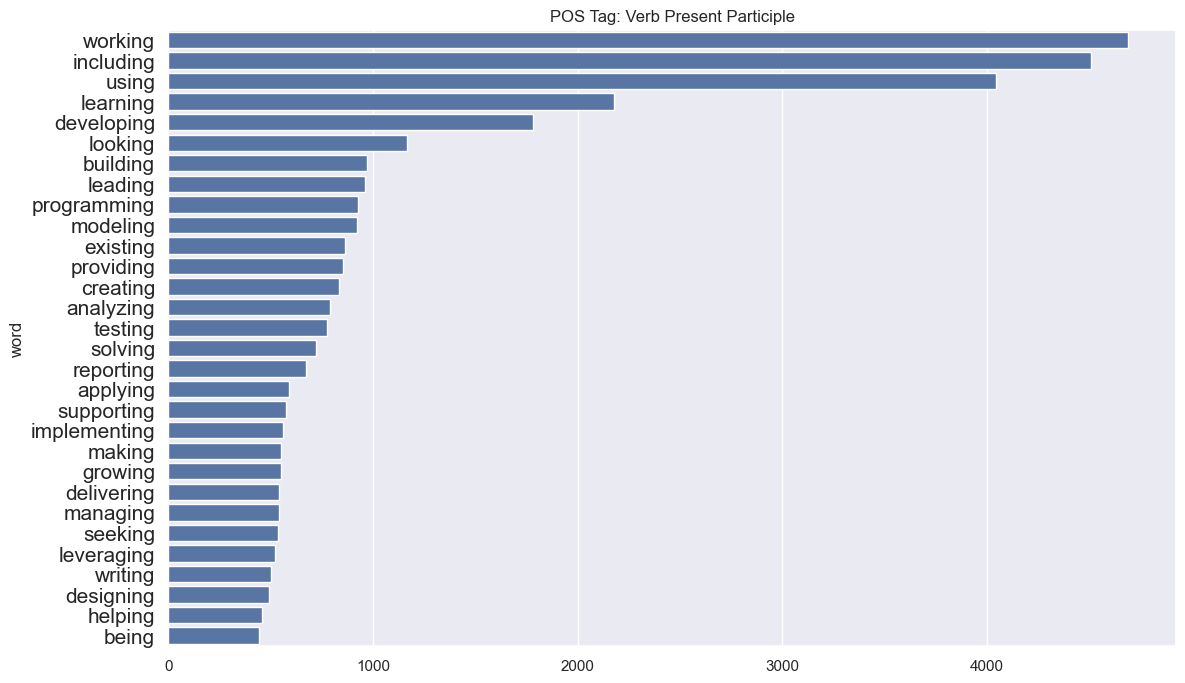

In [23]:
# Verb, present participle
VBG_tag = pos_df.loc[pos_df.POS == 'VBG'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBGbar = sns.barplot(y = VBG_tag.index, x = VBG_tag.values, orient = 'h')
plt.title('POS Tag: Verb Present Participle')
VBGbar.set_yticklabels(VBGbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\129811835.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  VBNbar.set_yticklabels(VBNbar.get_yticklabels(), fontsize = 15);


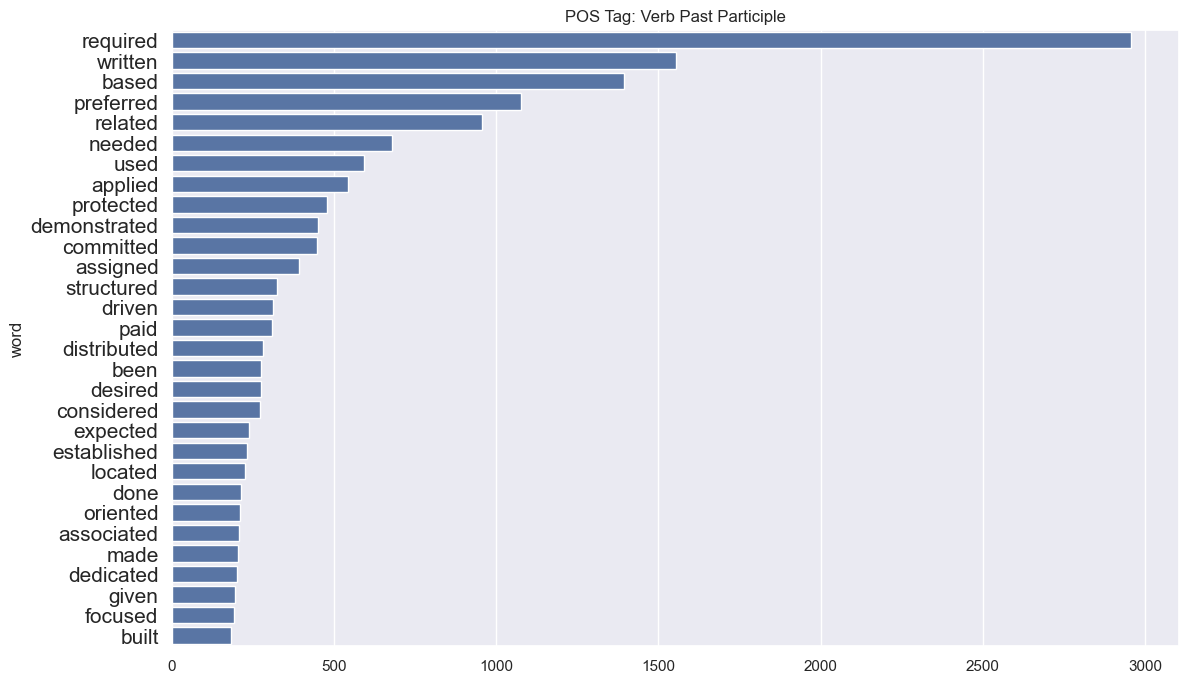

In [24]:
# Verb, past participle
VBN_tag = pos_df.loc[pos_df.POS == 'VBN'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBNbar = sns.barplot(y = VBN_tag.index, x = VBN_tag.values, orient = 'h')
plt.title('POS Tag: Verb Past Participle')
VBNbar.set_yticklabels(VBNbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\3991708200.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  PRPbar.set_yticklabels(PRPbar.get_yticklabels(), fontsize = 15);


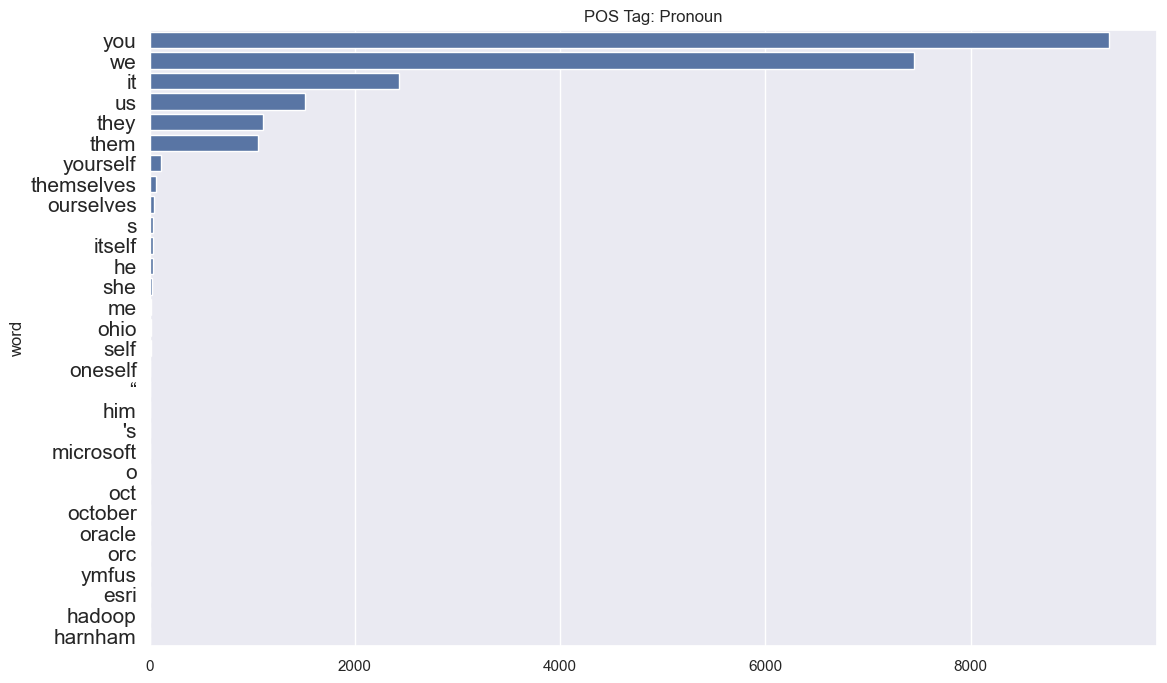

In [26]:
# Personal pronoun
PRP_tag = pos_df.loc[pos_df.POS == 'PRP'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
PRPbar = sns.barplot(y = PRP_tag.index, x = PRP_tag.values, orient = 'h')
plt.title('POS Tag: Pronoun')
PRPbar.set_yticklabels(PRPbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\1819386286.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);


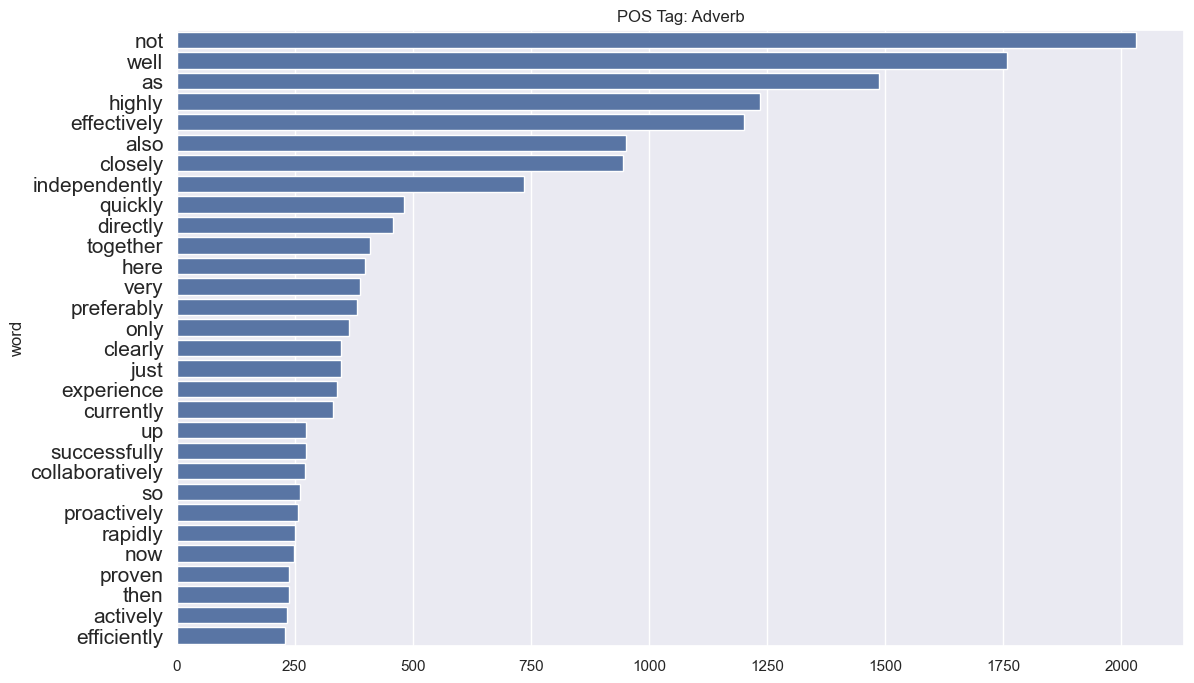

In [27]:
# adverb
RB_tag = pos_df.loc[pos_df.POS == 'RB'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
RBbar = sns.barplot(y = RB_tag.index, x = RB_tag.values, orient = 'h')
plt.title('POS Tag: Adverb')
RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\3494150836.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  VBDbar.set_yticklabels(VBDbar.get_yticklabels(), fontsize = 15);


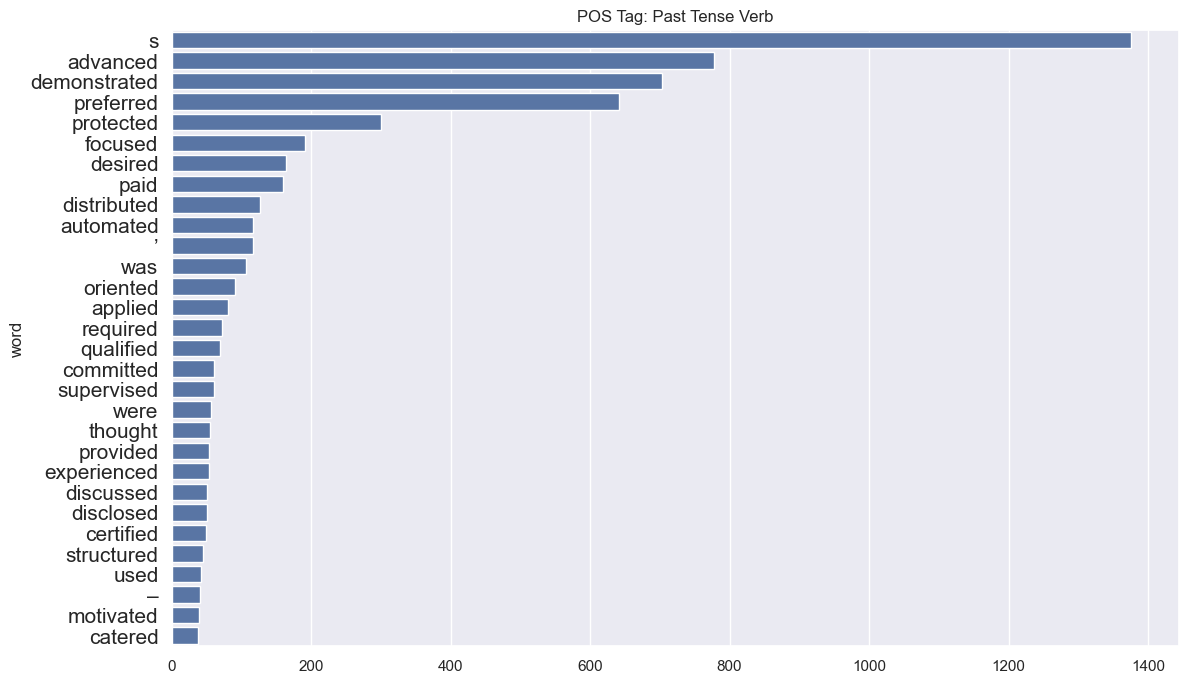

In [28]:
# Verb, past tense
VBD_tag = pos_df.loc[pos_df.POS == 'VBD'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
VBDbar = sns.barplot(y = VBD_tag.index, x = VBD_tag.values, orient = 'h')
plt.title('POS Tag: Past Tense Verb')
VBDbar.set_yticklabels(VBDbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\804824623.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);
d:\ThucTapDuAn_NLP\Job-Description-Skills-Extractor\.venv\lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 61623 (\uf0b7) missing from font(s) Arial.
  func(*args, **kwargs)
d:\ThucTapDuAn_NLP\Job-Description-Skills-Extractor\.venv\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 61623 (\uf0b7) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


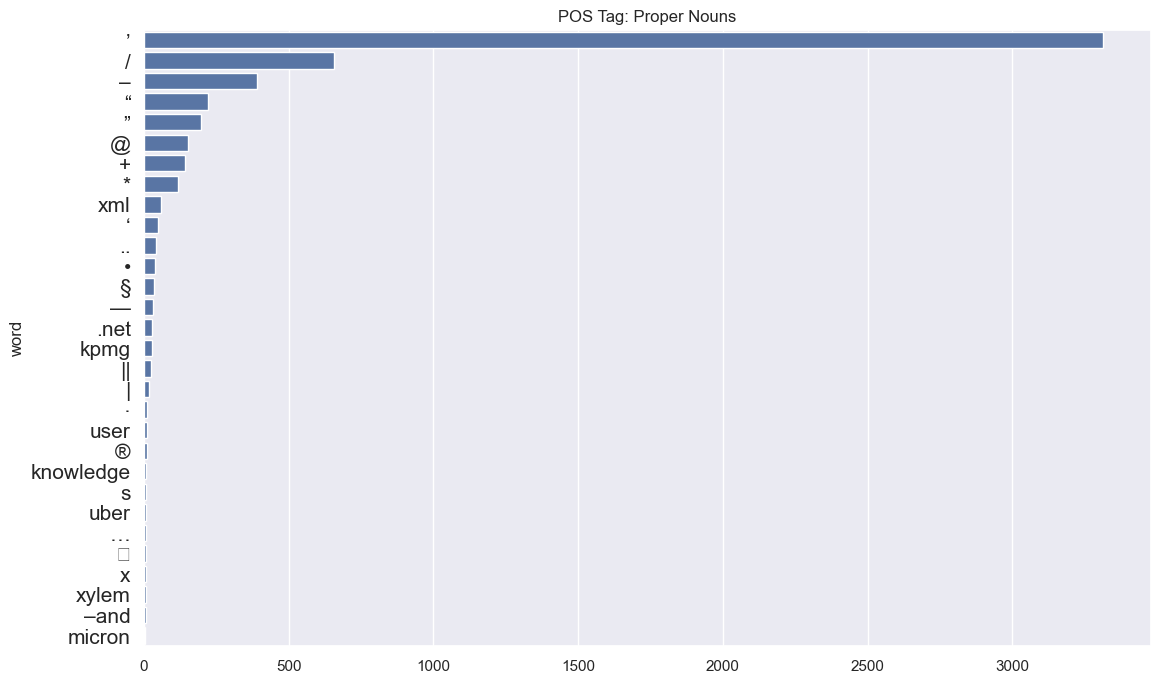

In [29]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'NNP'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Nouns')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\2783337958.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  JJRbar.set_yticklabels(JJRbar.get_yticklabels(), fontsize = 15);


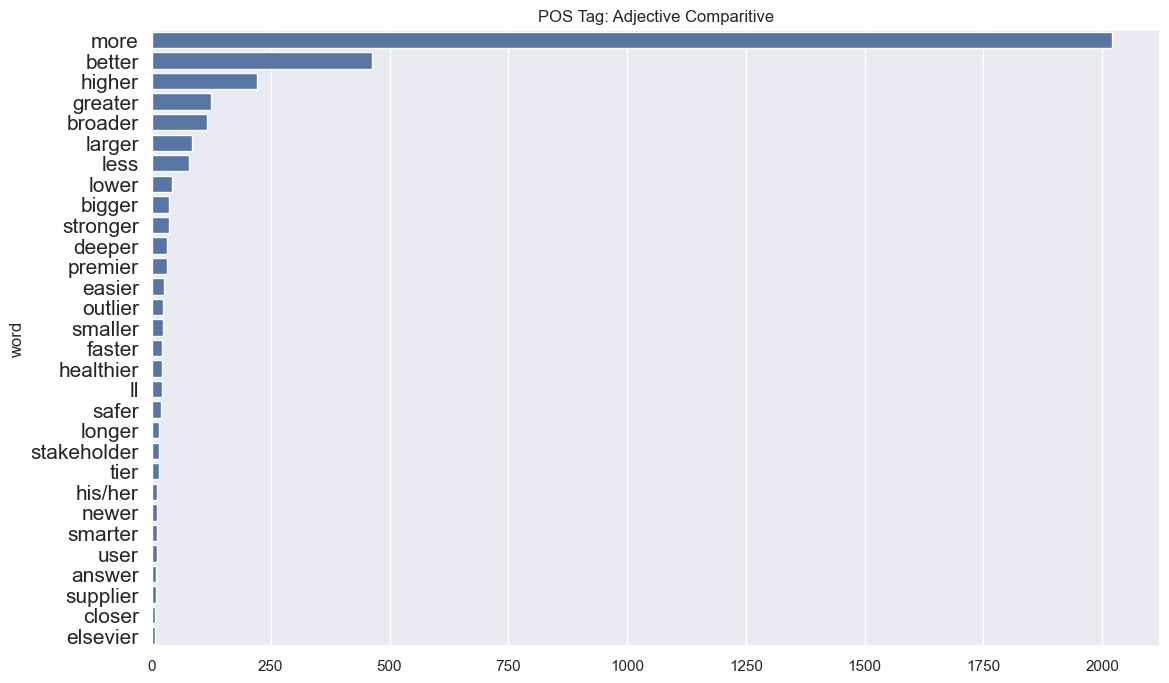

In [30]:
# 	Adjective, comparative
JJR_tag = pos_df.loc[pos_df.POS == 'JJR'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
JJRbar = sns.barplot(y = JJR_tag.index, x = JJR_tag.values, orient = 'h')
plt.title('POS Tag: Adjective Comparitive')
JJRbar.set_yticklabels(JJRbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\3157705498.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);


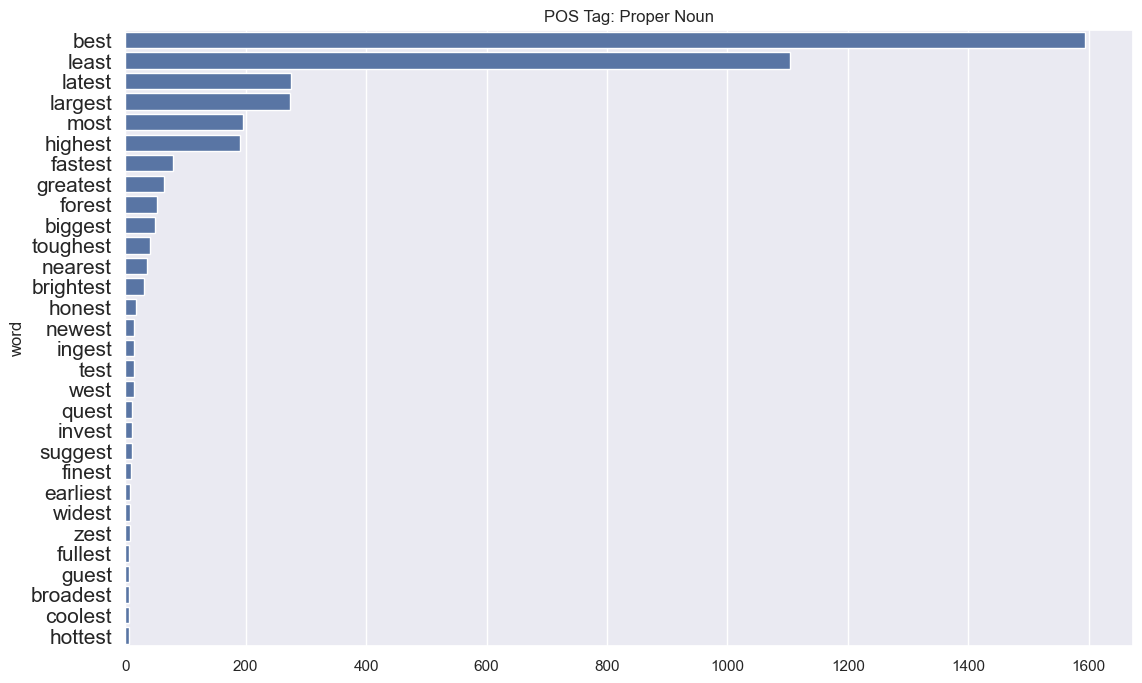

In [31]:
# Proper noun, singular
NNP_tag = pos_df.loc[pos_df.POS == 'JJS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
NNPbar = sns.barplot(y = NNP_tag.index, x = NNP_tag.values, orient = 'h')
plt.title('POS Tag: Proper Noun')
NNPbar.set_yticklabels(NNPbar.get_yticklabels(), fontsize = 15);

C:\Users\sora sama\AppData\Local\Temp\ipykernel_28616\2865347567.py:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);


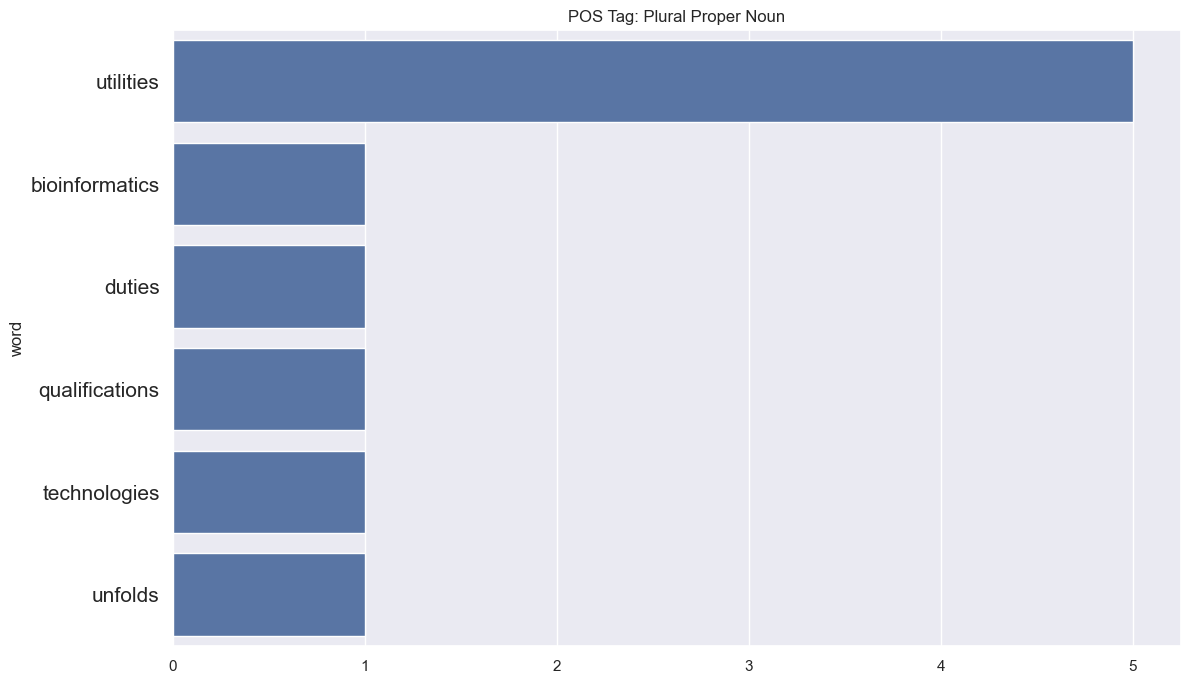

In [32]:
# Proper noun, plural
RB_tag = pos_df.loc[pos_df.POS == 'NNPS'].groupby('word').count().POS.nlargest(30)
sns.set(rc={'figure.figsize':(13,8)})
RBbar = sns.barplot(y = RB_tag.index, x = RB_tag.values, orient = 'h')
plt.title('POS Tag: Plural Proper Noun')
RBbar.set_yticklabels(RBbar.get_yticklabels(), fontsize = 15);